In [197]:
import numpy as np
import pandas as pd
import sys
from scipy.special import comb
import matplotlib.pyplot as plt
NBA_YEARS = range(1950, 2021)
MLB_YEARS = range (1903,2020)

In [198]:
def generate_collapse_scores_by_year(league, year, flat=False):
    df = pd.read_csv("data/" + league + "/" + str(year) + ".csv")
    
    season = {}
    
    for index, row in df.iterrows():
        home_team = row["home_team"]
        away_team = row["away_team"]
        home_win = row["home_team_score"] > row["away_team_score"]
               
        season[home_team] = np.append(season.get(home_team, np.array([])), home_win)
        season[away_team] = np.append(season.get(away_team, np.array([])), not home_win)
        
    # remove playoffs by finding minimum games played and only retaining those    
    
    regular_season_length = sys.maxsize
    
    for team in season:
        num_team_games = len(season[team])
        if num_team_games < regular_season_length:
            regular_season_length = num_team_games
            
    for team in season:
        season[team] = season[team][:regular_season_length]
        
    season_end_length = 10 if flat else round(regular_season_length / 2)
        
    # calculate collapse scores    
        
    collapse_scores = {}
    win_percents = {}
    
    for team in season:
        games = season[team]
        
        win_pct = np.sum(games) / len(games)
        season_end_wins = int(np.sum(games[-season_end_length:]))
        
        probability = 0
        
        for wins in range(0, season_end_wins + 1):
            temp = comb(season_end_length, wins) * win_pct ** wins * (1 - win_pct) ** (season_end_length - wins)
            probability += temp
            
        collapse_scores[team] = 1 / probability
        win_percents[team] = win_pct
        
    return collapse_scores, win_percents

def generate_collapse_scores(league, years):
    collapse_scores = {}
    team_years = {}
    win_percents = {}
    
    for year in years:
        year_collapse_scores, year_win_percents = generate_collapse_scores_by_year(league, year)
        
        for team in year_collapse_scores:
            collapse_scores[team] = np.append(collapse_scores.get(team, np.array([])), year_collapse_scores[team])
            team_years[team] = np.append(team_years.get(team, np.array([])), year)
            win_percents[team] = np.append(win_percents.get(team, np.array([])), year_win_percents[team])
            
    return collapse_scores, team_years, win_percents

In [199]:
nba_collapse_scores, nba_team_years, nba_win_percents = generate_collapse_scores("nba", NBA_YEARS)
mlb_collapse_scores, mlb_team_years, mlb_win_percents = generate_collapse_scores("mlb", MLB_YEARS)

[(1.7519624412000017, 1954.0), (1.8722438630260925, 1951.0), (1.8893194628336685, 1987.0), (1.9358917224922643, 1980.0), (2.0633484387812264, 1960.0), (2.0642873050663524, 1952.0), (2.1143270665599223, 1998.0), (2.127823864606303, 1984.0), (2.1359377534838173, 1999.0), (2.184245131971043, 2019.0), (2.1957435186123737, 1966.0), (2.198935463559024, 1956.0), (2.1996722268849425, 1959.0), (2.2208138336383305, 2016.0), (2.2431685029151107, 1997.0), (2.2471425378624574, 1961.0), (2.260637744515939, 1975.0), (2.306007561333561, 2008.0), (2.3062880718978587, 1957.0), (2.324870791572965, 2004.0), (2.330649033462316, 1989.0), (2.3345102386803673, 1988.0), (2.3437931132313055, 1982.0), (2.3475352611067883, 1981.0), (2.352794120349982, 1962.0), (2.3546695795905306, 1953.0), (2.3590093253253754, 1991.0), (2.3662815769943806, 2009.0), (2.3764293525036386, 1973.0), (2.376894832017009, 2020.0), (2.401914405169493, 1977.0), (2.408613200602415, 1990.0), (2.42357708752879, 1996.0), (2.457659344545797, 19

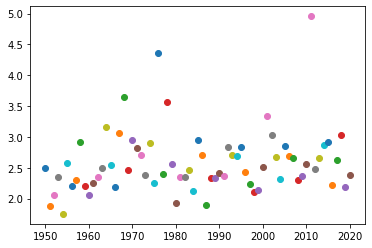

In [200]:
#average collapse score over time in NBA
def print_over_time(collapse_scores, team_years):
    yearDict={}
    for i in zip(collapse_scores, team_years):
        for x in zip(collapse_scores[i[0]],team_years[i[0]]):
            if(x[1] not in yearDict):
                yearDict[x[1]]=[x[0]]
            else:
                yearDict[x[1]].append(x[0])
    avgYearDict={}
    for x in yearDict:
        avgYearDict[x]=sum(yearDict[x])/len(yearDict[x])
    sort=(sorted(list(avgYearDict.values())))
    sortedList=[]
    for i in sort:
        sortedList.append((i,list(avgYearDict.keys())[list(avgYearDict.values()).index(i)]))
    for i in zip(avgYearDict.keys(),avgYearDict.values()):
        plt.scatter(i[0],i[1])
    print(sortedList)
    
    
print_over_time(nba_collapse_scores, nba_team_years)    
    

[(1.9975567583442748, 1947.0), (2.042122627514501, 1937.0), (2.0648250411311113, 1903.0), (2.0730300594653928, 1967.0), (2.1024577777798887, 1910.0), (2.115833444211589, 1919.0), (2.1350656713906067, 1968.0), (2.1460904328685544, 1965.0), (2.15308396527432, 1957.0), (2.1674338309883088, 1956.0), (2.2110140791989137, 1990.0), (2.241751144911745, 1920.0), (2.243042568307947, 2017.0), (2.2480762278345146, 2013.0), (2.2529939714534906, 1917.0), (2.2650653075917133, 1922.0), (2.265826530860958, 1989.0), (2.272763741903541, 1946.0), (2.2863005976451793, 1925.0), (2.2886178347823303, 1904.0), (2.289666218432991, 1999.0), (2.3005946911, 1993.0), (2.305150487895418, 1933.0), (2.3311557705539756, 1959.0), (2.3345898980726494, 1953.0), (2.3383704722301624, 1972.0), (2.354947211617422, 2002.0), (2.362509904061163, 2007.0), (2.3639939980136324, 1939.0), (2.3666164580723925, 2016.0), (2.3701822858314463, 2011.0), (2.379517072539479, 1981.0), (2.40581226075246, 1996.0), (2.4226349261443647, 1980.0), 

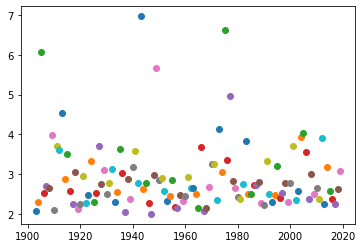

In [201]:
print_over_time(mlb_collapse_scores, mlb_team_years)

In [202]:
def team_average_collapse_scores(collapse_scores):
    means = {}
    stds = {}
    
    for team in collapse_scores:
        scores = collapse_scores[team]
        means[team] = np.mean(scores)
        stds[team] = np.std(scores)
        
    return means, stds

team_average_collapse_scores(nba_collapse_scores)

({'TRI-CITIES BLACKHAWKS': 1.4218376229253196,
  'DENVER NUGGETS': 2.5020822325566185,
  'CHICAGO STAGS': 2.8061888163493096,
  'NEW YORK KNICKS': 2.715604364911804,
  'INDIANAPOLIS OLYMPIANS': 1.9473364813889835,
  'ROCHESTER ROYALS': 2.541025218772376,
  'SHEBOYGAN RED SKINS': 5.726267976499117,
  'ST. LOUIS BOMBERS': 7.6193542317813545,
  'PHILADELPHIA WARRIORS': 2.1906753120959004,
  'MINNEAPOLIS LAKERS': 1.6655591760340671,
  'WATERLOO HAWKS': 1.139716380479319,
  'WASHINGTON CAPITOLS': 1.7220501157304144,
  'BALTIMORE BULLETS': 2.3290789322883323,
  'ANDERSON PACKERS': 2.0193098687663475,
  'FORT WAYNE PISTONS': 2.8571005385382424,
  'BOSTON CELTICS': 2.553477292222381,
  'SYRACUSE NATIONALS': 1.8271436953768578,
  'MILWAUKEE HAWKS': 1.3038810036589175,
  'ST. LOUIS HAWKS': 2.4046980871923966,
  'DETROIT PISTONS': 2.3567747417285316,
  'CINCINNATI ROYALS': 2.526887834546569,
  'LOS ANGELES LAKERS': 2.9910315411213633,
  'CHICAGO PACKERS': 1.7003259136566105,
  'CHICAGO ZEPHYRS': 

In [203]:
def plot_histogram(collapse_scores, title):
    hist_array = np.array([])
    
    for team in collapse_scores:
        hist_array = np.append(hist_array, collapse_scores[team])
        
    plt.figure(figsize=(12, 8))
                
    plt.hist(hist_array, bins=50, density=True)
    plt.yscale("log")
    
    plt.title(title)
    plt.xlabel("Collapse score")
    plt.ylabel("Occurrence density (log scale)")
    
def plot_histograms(collapse_scores1, collapse_scores2):
    hist_array1 = np.array([])
    
    for team in collapse_scores1:
        hist_array1 = np.append(hist_array1, collapse_scores1[team])
        
    hist_array2 = np.array([])
    
    for team in collapse_scores2:
        hist_array2 = np.append(hist_array2, collapse_scores2[team])
    
    bins = np.linspace(0, 100)
    print(max(np.amax(hist_array1), np.amax(hist_array2)))
    
    plt.figure(figsize=(12, 8))
    
    plt.yscale("log")
                       
    plt.hist(hist_array1, bins=bins, alpha=0.45, density=True, color="blue")
    plt.hist(hist_array2, bins=bins, alpha=0.45, density=True, color="green")
    plt.legend(["MLB", "NBA"])
    
    plt.title("Collapse Scores")
    plt.xlabel("Collapse score")
    plt.ylabel("Occurrence density (log scale)")

   
    


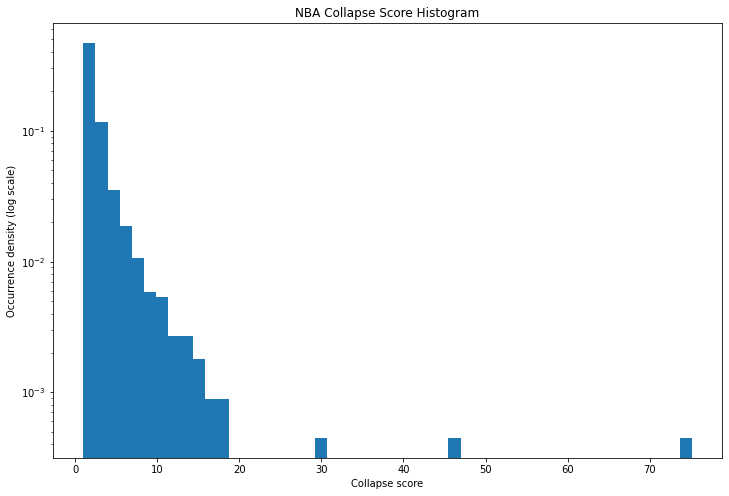

In [204]:
plot_histogram(nba_collapse_scores, "NBA Collapse Score Histogram")

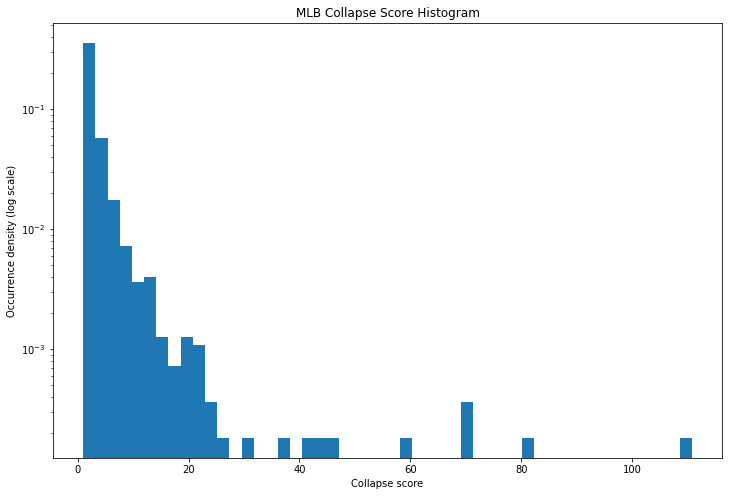

In [205]:
plot_histogram(mlb_collapse_scores, "MLB Collapse Score Histogram")

110.81208862914201


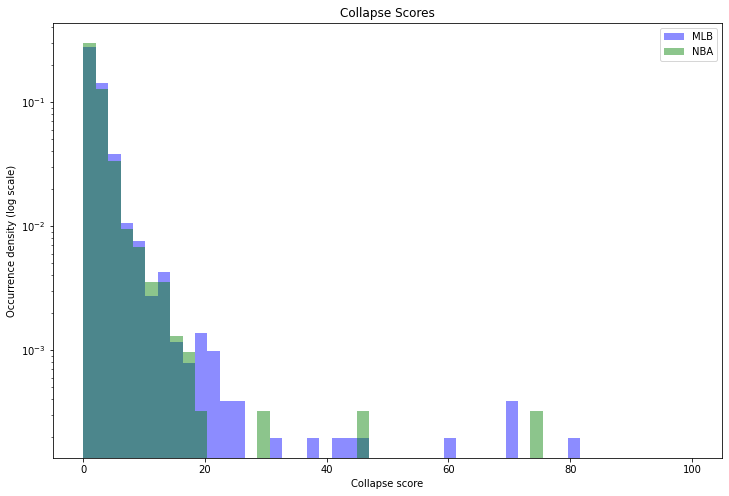

In [206]:
plot_histograms(mlb_collapse_scores, nba_collapse_scores)

In [207]:
# nba_collapse_scores, nba_team_years, win_percents
# mlb_collapse_scores, mlb_team_years, win_percents

def get_sorted_scores(collapse_scores, team_years):
    
    scores = []
#     sorted_scores = np.array([], dtype=[('score', float), ('team', str), ('year', float)])
    
    for team in collapse_scores:
        team_scores = collapse_scores[team]
        years = team_years[team]
        for i in range(len(team_scores)):
            score = team_scores[i]
            year = years[i]            
            scores.append((score, team, year))
            
    scores = np.array(scores, dtype=[('score', float), ('team', "S40"), ('year', float)])
            
    return np.sort(scores, order='score')
    

In [208]:
get_sorted_scores(nba_collapse_scores, nba_team_years)[::-1][:10]

array([(75.13285336, b'UTAH JAZZ', 2011.),
       (46.61207332, b'ATLANTA HAWKS', 1976.),
       (30.54112977, b'PORTLAND TRAIL BLAZERS', 1978.),
       (18.71552474, b'GOLDEN STATE WARRIORS', 2001.),
       (17.81178014, b'DENVER NUGGETS', 1992.),
       (17.05390311, b'MILWAUKEE BUCKS', 2002.),
       (16.99081199, b'SAN FRANCISCO WARRIORS', 1968.),
       (15.53363956, b'PHILADELPHIA 76ERS', 1985.),
       (14.68118765, b'INDIANA PACERS', 2014.),
       (14.42035526, b'SAN FRANCISCO WARRIORS', 1970.)],
      dtype=[('score', '<f8'), ('team', 'S40'), ('year', '<f8')])

In [209]:
get_sorted_scores(mlb_collapse_scores, mlb_team_years)[::-1][:10]

array([(110.81208863, b'Milwaukee Brewers', 1975.),
       ( 80.80783579, b'Philadelphia Athletics', 1943.),
       ( 69.86495504, b'Cleveland Indians', 1905.),
       ( 69.69737778, b'Chicago Cubs', 1977.),
       ( 60.15430292, b'Washington Senators', 1949.),
       ( 46.17222155, b'Milwaukee Brewers', 2004.),
       ( 44.61445289, b'Washington Nationals', 2005.),
       ( 41.09792611, b'Chicago Cubs', 1973.),
       ( 36.95988677, b'California Angels', 1983.),
       ( 31.12706342, b'Cleveland Indians', 1909.)],
      dtype=[('score', '<f8'), ('team', 'S40'), ('year', '<f8')])

In [210]:
def plot_correlations(collapse_scores, win_percents, league):
    collapse_scores_arr = np.array([])
    win_percents_arr = np.array([])
    
    for team in collapse_scores:
        collapse_scores_arr = np.append(collapse_scores_arr, collapse_scores[team])
        win_percents_arr = np.append(win_percents_arr, win_percents[team])
    
    plt.figure(figsize=(12, 8))
    plt.yscale("log")
    plt.scatter(win_percents_arr, collapse_scores_arr, s=10)
    plt.xlabel("Win percent")
    plt.ylabel("Collapse score")
    plt.title("Collapse Score vs. Win Percent (" + league + ")")
    
def plot_correlations_combined(collapse_scores1, collapse_scores2, win_percents1, win_percents2, league1, league2):
    collapse_scores1_arr = np.array([])
    win_percents1_arr = np.array([])
    
    for team in collapse_scores1:
        collapse_scores1_arr = np.append(collapse_scores1_arr, collapse_scores1[team])
        win_percents1_arr = np.append(win_percents1_arr, win_percents1[team])
        
    collapse_scores2_arr = np.array([])
    win_percents2_arr = np.array([])
    
    for team in collapse_scores2:
        collapse_scores2_arr = np.append(collapse_scores2_arr, collapse_scores2[team])
        win_percents2_arr = np.append(win_percents2_arr, win_percents2[team])
    
    plt.figure(figsize=(12, 8))
    plt.yscale("log")
    plt.scatter(win_percents1_arr, collapse_scores1_arr, s=10, color="blue")
    plt.scatter(win_percents2_arr, collapse_scores2_arr, s=10, color="green")
    plt.legend([league1, league2])
    plt.xlabel("Win percent")
    plt.ylabel("Collapse score")
    plt.title("Collapse Score vs. Win Percent")

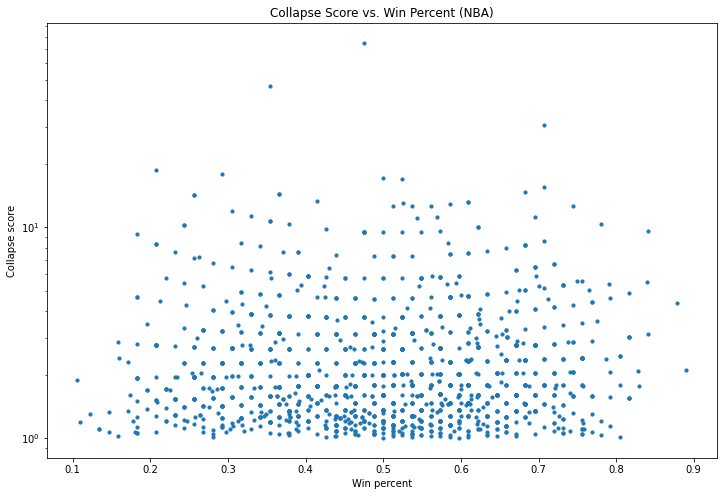

In [211]:
plot_correlations(nba_collapse_scores, nba_win_percents, "NBA")

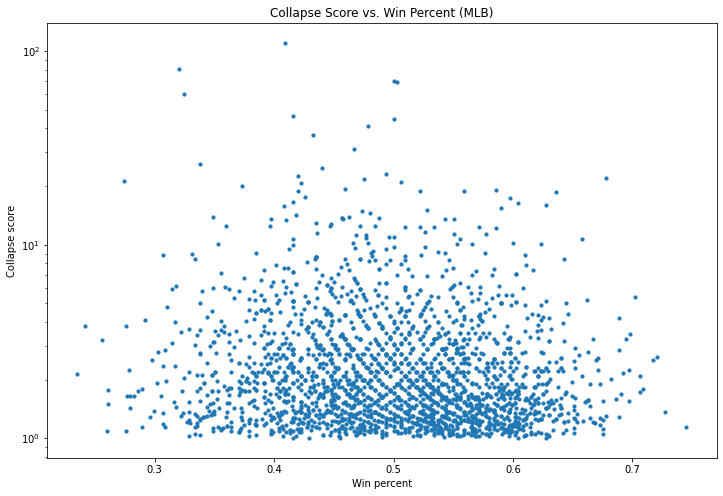

In [212]:
plot_correlations(mlb_collapse_scores, mlb_win_percents, "MLB")

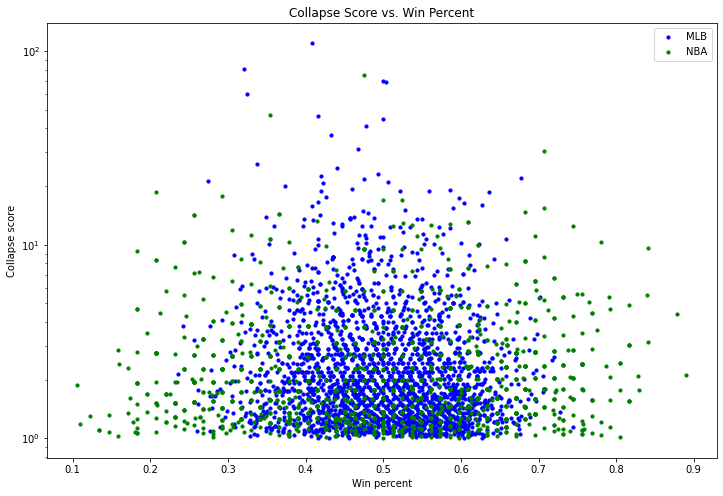

In [213]:
plot_correlations_combined(mlb_collapse_scores, nba_collapse_scores, mlb_win_percents, nba_win_percents, "MLB", "NBA")